In [1]:
import pandas as pd
import plotly.express as px
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


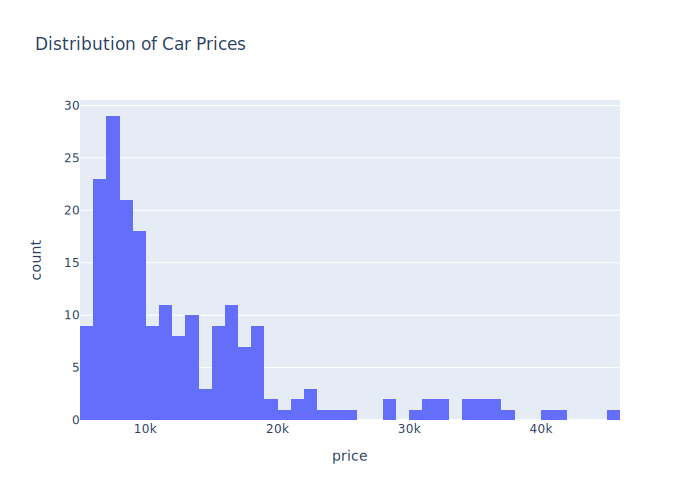

In [2]:
fig = px.histogram(df, x='price', nbins=50, title='Distribution of Car Prices')
fig.show("svg")

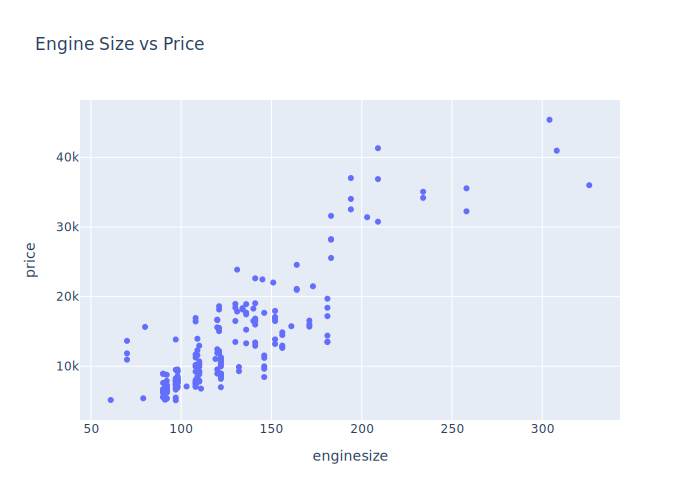

In [3]:
fig = px.scatter(df, x='enginesize', y='price', title='Engine Size vs Price')
fig.show('svg')

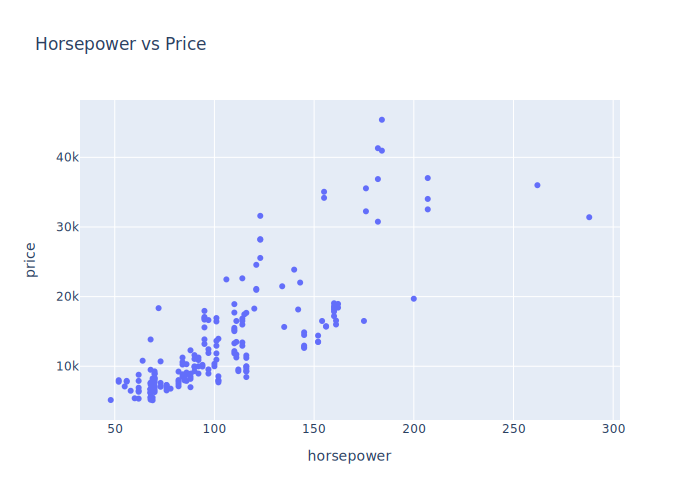

In [4]:
fig = px.scatter(df, x='horsepower', y='price', title='Horsepower vs Price')
fig.show('svg')

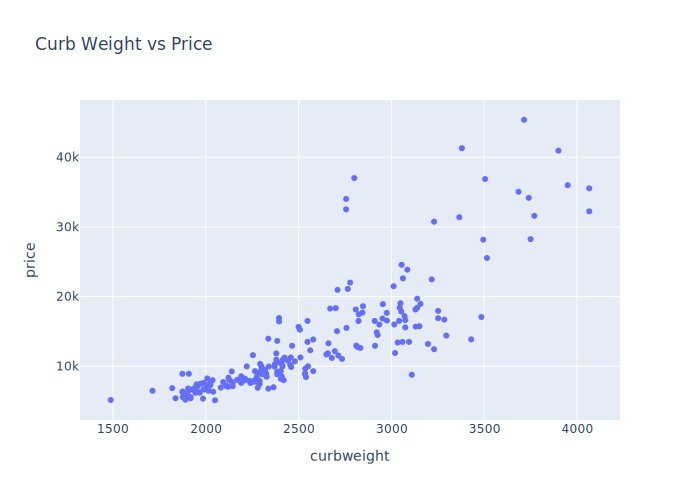

In [5]:
fig = px.scatter(df, x='curbweight', y='price', title='Curb Weight vs Price')
fig.show('svg')

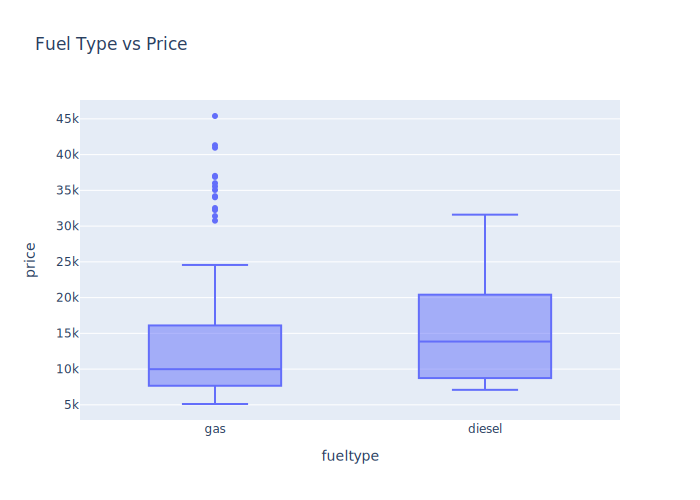

In [6]:
fig = px.box(df, x='fueltype', y='price', title='Fuel Type vs Price')
fig.show('svg')

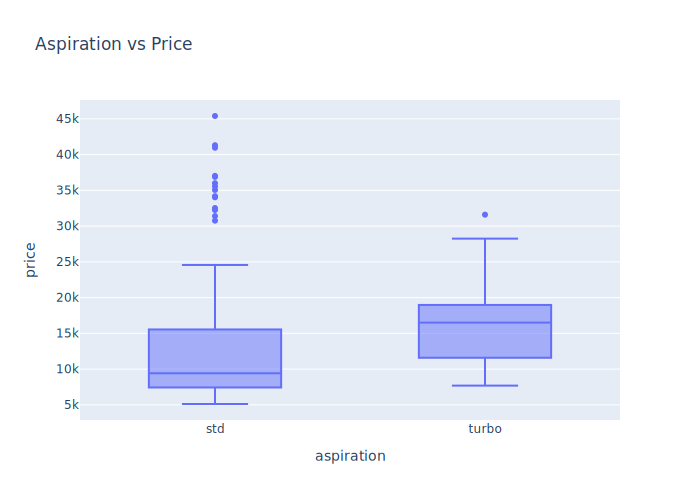

In [7]:
fig = px.box(df, x='aspiration', y='price', title='Aspiration vs Price')
fig.show('svg')

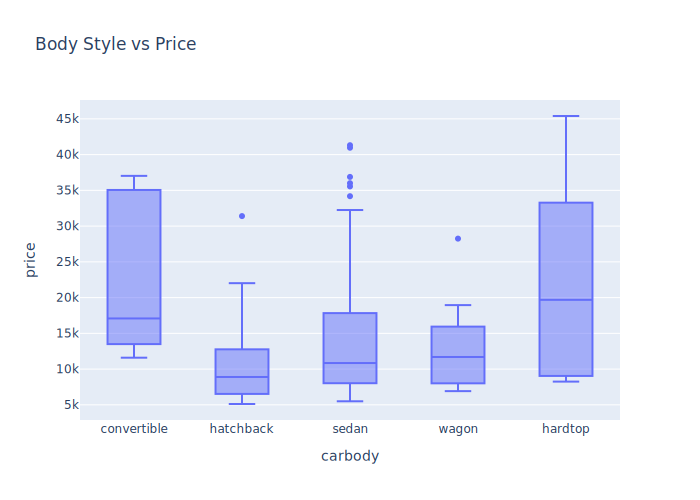

In [8]:
fig = px.box(df, x='carbody', y='price', title='Body Style vs Price')
fig.show('svg')

## Inferences from the Plots

1. **Engine Size vs Price**: There is a positive correlation between engine size and price. As the engine size increases, the price of the car also tends to increase. This suggests that cars with larger engines are generally more expensive.

2. **Horsepower vs Price**: Similar to engine size, there is a positive correlation between horsepower and price. Cars with higher horsepower are generally more expensive. This is expected as high-performance cars with more horsepower are usually priced higher.

3. **Curb Weight vs Price**: There is a positive correlation between the curb weight of a car and its price. Heavier cars, which are often larger and have more features, tend to be more expensive.

4. **Fuel Type vs Price**: The box plot shows that diesel cars are generally more expensive than gas cars. However, there is a significant overlap in the price ranges of the two types of cars.

5. **Aspiration vs Price**: Turbo cars tend to be more expensive than standard cars, but there is a significant overlap in the price ranges of the two types of cars.

6. **Body Style vs Price**: The price range varies significantly among different body styles. Convertible and hardtop cars tend to be more expensive, while hatchback cars are generally less expensive. Sedan and wagon cars fall in the middle of the price range.

These observations suggest that engine size, horsepower, and curb weight are strong predictors of car price. Fuel type, aspiration, and body style may also influence the price, but the relationships are not as strong.

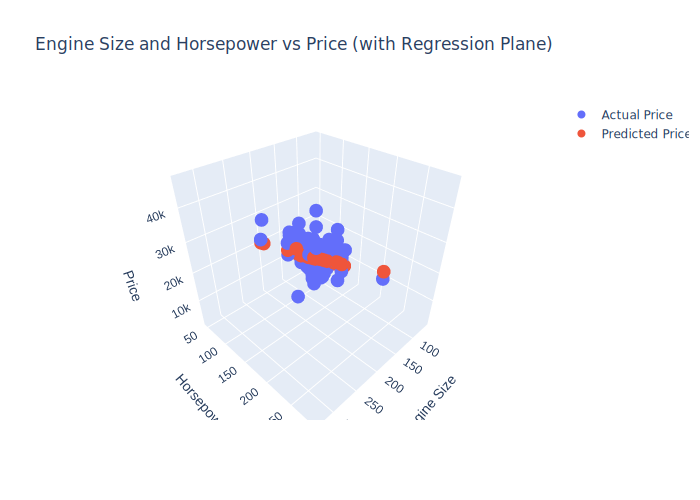

In [9]:
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = df[['enginesize', 'horsepower']]
y = df['price']
model.fit(X, y)

# Predicting the prices
predicted_prices = model.predict(X)

# Creating the 3D scatter plot
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['enginesize'], y=df['horsepower'], z=df['price'],
                           mode='markers', name='Actual Price'))
fig.add_trace(go.Scatter3d(x=df['enginesize'], y=df['horsepower'], z=predicted_prices,
                           mode='markers', name='Predicted Price'))
fig.update_layout(scene = dict(xaxis_title='Engine Size',
                               yaxis_title='Horsepower',
                               zaxis_title='Price'),
                  title='Engine Size and Horsepower vs Price (with Regression Plane)')
fig.show('svg')

## Inference from Engine Size and Horsepower vs Price Regression Graph
The regression graph provides a visual representation of the relationship between engine size, horsepower, and price. The trend observed from the graph indicates that both engine size and horsepower have a positive correlation with the price of the car. This means that as the engine size and horsepower increase, the price of the car also tends to increase.
The orange dots represent the predicted prices based on the linear regression model trained on engine size and horsepower. The model seems to fit the data well, indicating that engine size and horsepower are significant predictors of car price.
However, there are some outliers where the actual price (blue dots) deviates significantly from the predicted price. These could be due to other factors not considered in this model, such as brand value, car age, or additional features.

## Bivariate Analysis Inference

The scatter plot above shows the relationship between engine size, horsepower, and price. The size of the points represents the horsepower of the cars. From the plot, we can infer that cars with larger engines and more horsepower tend to be more expensive. This is consistent with our previous observations.

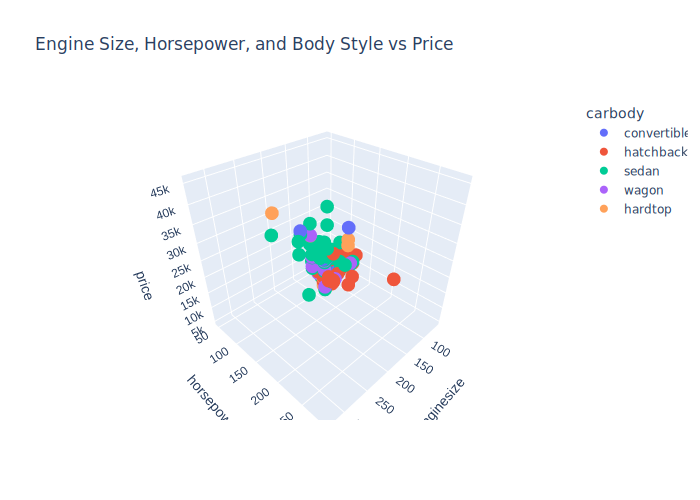

In [10]:
fig = px.scatter_3d(df, x='enginesize', y='horsepower', z='price', color='carbody', title='Engine Size, Horsepower, and Body Style vs Price')
fig.show('svg')

## Trivariate Analysis Inference

The 3D scatter plot above shows the relationship between engine size, horsepower, body style, and price. The color of the points represents the body style of the cars. From the plot, we can infer the following:

1. Cars with larger engines and more horsepower tend to be more expensive, regardless of the body style.
2. Convertible and hardtop cars (represented by the red and orange points) are generally more expensive, even with similar engine sizes and horsepower.
3. Hatchback cars (represented by the blue points) are generally less expensive, even with similar engine sizes and horsepower.

This analysis further confirms our previous observations and provides additional insight into the influence of body style on car price.

## Conclusion and Key Takeaways

From the above analysis, we can draw several key conclusions:

1. **Engine Size, Horsepower**: These are strong predictors of car price. Cars with larger engines and more horsepower tend to be more expensive. The regression graph further confirms this relationship and shows that a linear regression model trained on engine size and horsepower can predict car prices with reasonable accuracy.

2. **Curb Weight**: Heavier cars, which are often larger and have more features, tend to be more expensive.

3. **Fuel Type and Aspiration**: These factors also influence car price, but the relationships are not as strong. Diesel and turbo cars are generally more expensive than their counterparts.

4. **Body Style**: The body style of a car can significantly influence its price. Convertible and hardtop cars are generally more expensive, while hatchback cars are usually less expensive.

5. **Bivariate and Trivariate Analysis**: These analyses further confirmed the relationships observed in the univariate analysis and provided additional insights. For instance, the trivariate analysis showed that convertible and hardtop cars tend to be more expensive, even with similar engine sizes and horsepower.

These insights can be very useful for predicting car prices. However, it's important to remember that these are general trends and there can be exceptions. Other factors not included in this dataset, such as brand reputation, car age, and mileage, can also significantly influence car prices.